In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.cluster import KMeans
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome   
0   1826        1970  Graduation       Divorced  $84,835.00         0  \
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases   
0         0     6/16/14        0       189  ...                  6  \
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1   
0                  1             0             0             0             0  \
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [3]:
# df.corr(numeric_only=True)

In [4]:
df1 = df.copy()

In [5]:
df1.dropna(inplace = True)

In [6]:
df1.shape

(2216, 28)

In [7]:
df1.rename(columns = {' Income ': 'Income'},inplace = True)
df1['Income'] = df1['Income'].str.replace(",","") # here i replace , with ""
df1['Income'] = df1['Income'].str.replace("$","") # here i replace $ with ""
df1['Income'] = df1['Income'].astype(float) # change the data type to float to create a boxlpot because there is no chance to create a boxplot of a object column 

In [8]:
df1['Income'] = df1['Income'].astype(int)

In [9]:
df1

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome   
0      1826        1970  Graduation       Divorced   84835        0         0  \
1         1        1961  Graduation         Single   57091        0         0   
2     10476        1958  Graduation        Married   67267        0         1   
3      1386        1967  Graduation       Together   32474        1         1   
4      5371        1989  Graduation         Single   21474        1         0   
...     ...         ...         ...            ...     ...      ...       ...   
2235  10142        1976         PhD       Divorced   66476        0         1   
2236   5263        1977    2n Cycle        Married   31056        1         0   
2237     22        1976  Graduation       Divorced   46310        1         0   
2238    528        1978  Graduation        Married   65819        0         0   
2239   4070        1969         PhD        Married   94871        0         2   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases   
0        6/16/14        0       189  ...                  6  \
1        6/15/14        0       464  ...                  7   
2        5/13/14        0       134  ...                  5   
3        5/11/14        0        10  ...                  2   
4         4/8/14        0         6  ...                  2   
...          ...      ...       ...  ...                ...   
2235      3/7/13       99       372  ...                 11   
2236     1/22/13       99         5  ...                  3   
2237     12/3/12       99       185  ...                  5   
2238    11/29/12       99       267  ...                 10   
2239      9/1/12       99       169  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5   
0                     1             0             0             0  \
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           ...   
2235                  4             0             0             0   
2236                  8             0             0             0   
2237                  8             0             0             0   
2238                  3             0             0             0   
2239                  7             0             1             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
0                0             0         1         0       SP  
1                0             1         1         0       CA  
2                0             0         0         0       US  
3                0             0         0         0      AUS  
4                0             0         1         0       SP  
...            ...           ...       ...       ...      ...  
2235             0             0         0         0       US  
2236             0             0         0         0       SP  
2237             0             0         0         0       SP  
2238             0             0         0         0      IND  
2239             0             0         1         0       CA  

[2216 rows x 28 columns]

In [10]:
df1['EncodedCountry'] = label_encoder.fit_transform(df1['Country'])

In [11]:
df1.drop(columns = 'Country',inplace = True)

In [12]:
df1.drop(columns = 'Dt_Customer',inplace = True)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   int32 
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Recency              2216 non-null   int64 
 8   MntWines             2216 non-null   int64 
 9   MntFruits            2216 non-null   int64 
 10  MntMeatProducts      2216 non-null   int64 
 11  MntFishProducts      2216 non-null   int64 
 12  MntSweetProducts     2216 non-null   int64 
 13  MntGoldProds         2216 non-null   int64 
 14  NumDealsPurchases    2216 non-null   int64 
 15  NumWebPurchases      2216 non-null   int64 
 16  NumCatalogP

In [14]:
df1['EncodedEducation'] = label_encoder.fit_transform(df1['Education'])
df1['EncodedMaritalStatus'] = label_encoder.fit_transform(df1['Marital_Status'])

In [15]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'EncodedCountry', 'EncodedEducation',
       'EncodedMaritalStatus'],
      dtype='object')

In [16]:
df1.drop(columns = ['Education','Marital_Status'],inplace = True)

In [17]:
df_New = df1.copy()

In [18]:
# df_New.drop(columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
#        'AcceptedCmp1', 'AcceptedCmp2'],inplace = True)

In [19]:
df_New

ID  Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines   
0      1826        1970   84835        0         0        0       189  \
1         1        1961   57091        0         0        0       464   
2     10476        1958   67267        0         1        0       134   
3      1386        1967   32474        1         1        0        10   
4      5371        1989   21474        1         0        0         6   
...     ...         ...     ...      ...       ...      ...       ...   
2235  10142        1976   66476        0         1       99       372   
2236   5263        1977   31056        1         0       99         5   
2237     22        1976   46310        1         0       99       185   
2238    528        1978   65819        0         0       99       267   
2239   4070        1969   94871        0         2       99       169   

      MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3   
0           104              379              111  ...             0  \
1             5               64                7  ...             0   
2            11               59               15  ...             0   
3             0                1                0  ...             0   
4            16               24               11  ...             1   
...         ...              ...              ...  ...           ...   
2235         18              126               47  ...             0   
2236         10               13                3  ...             0   
2237          2               88               15  ...             0   
2238         38              701              149  ...             0   
2239         24              553              188  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response   
0                0             0             0             0         1  \
1                0             0             0             1         1   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         1   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             0             0         0   
2237             0             0             0             0         0   
2238             0             0             0             0         0   
2239             1             1             0             0         1   

      Complain  EncodedCountry  EncodedEducation  EncodedMaritalStatus  
0            0               6                 2                     2  
1            0               1                 2                     4  
2            0               7                 2                     3  
3            0               0                 2                     5  
4            0               6                 2                     4  
...        ...             ...               ...                   ...  
2235         0               7                 4                     2  
2236         0               6                 0                     3  
2237         0               6                 2                     2  
2238         0               3                 2                     3  
2239         0               1                 4                     3  

[2216 rows x 27 columns]

In [20]:
# df_New.drop(527,inplace = True)
# df_New.drop(731,inplace = True)
# df_New.drop(1826,inplace = True)

<Axes: >

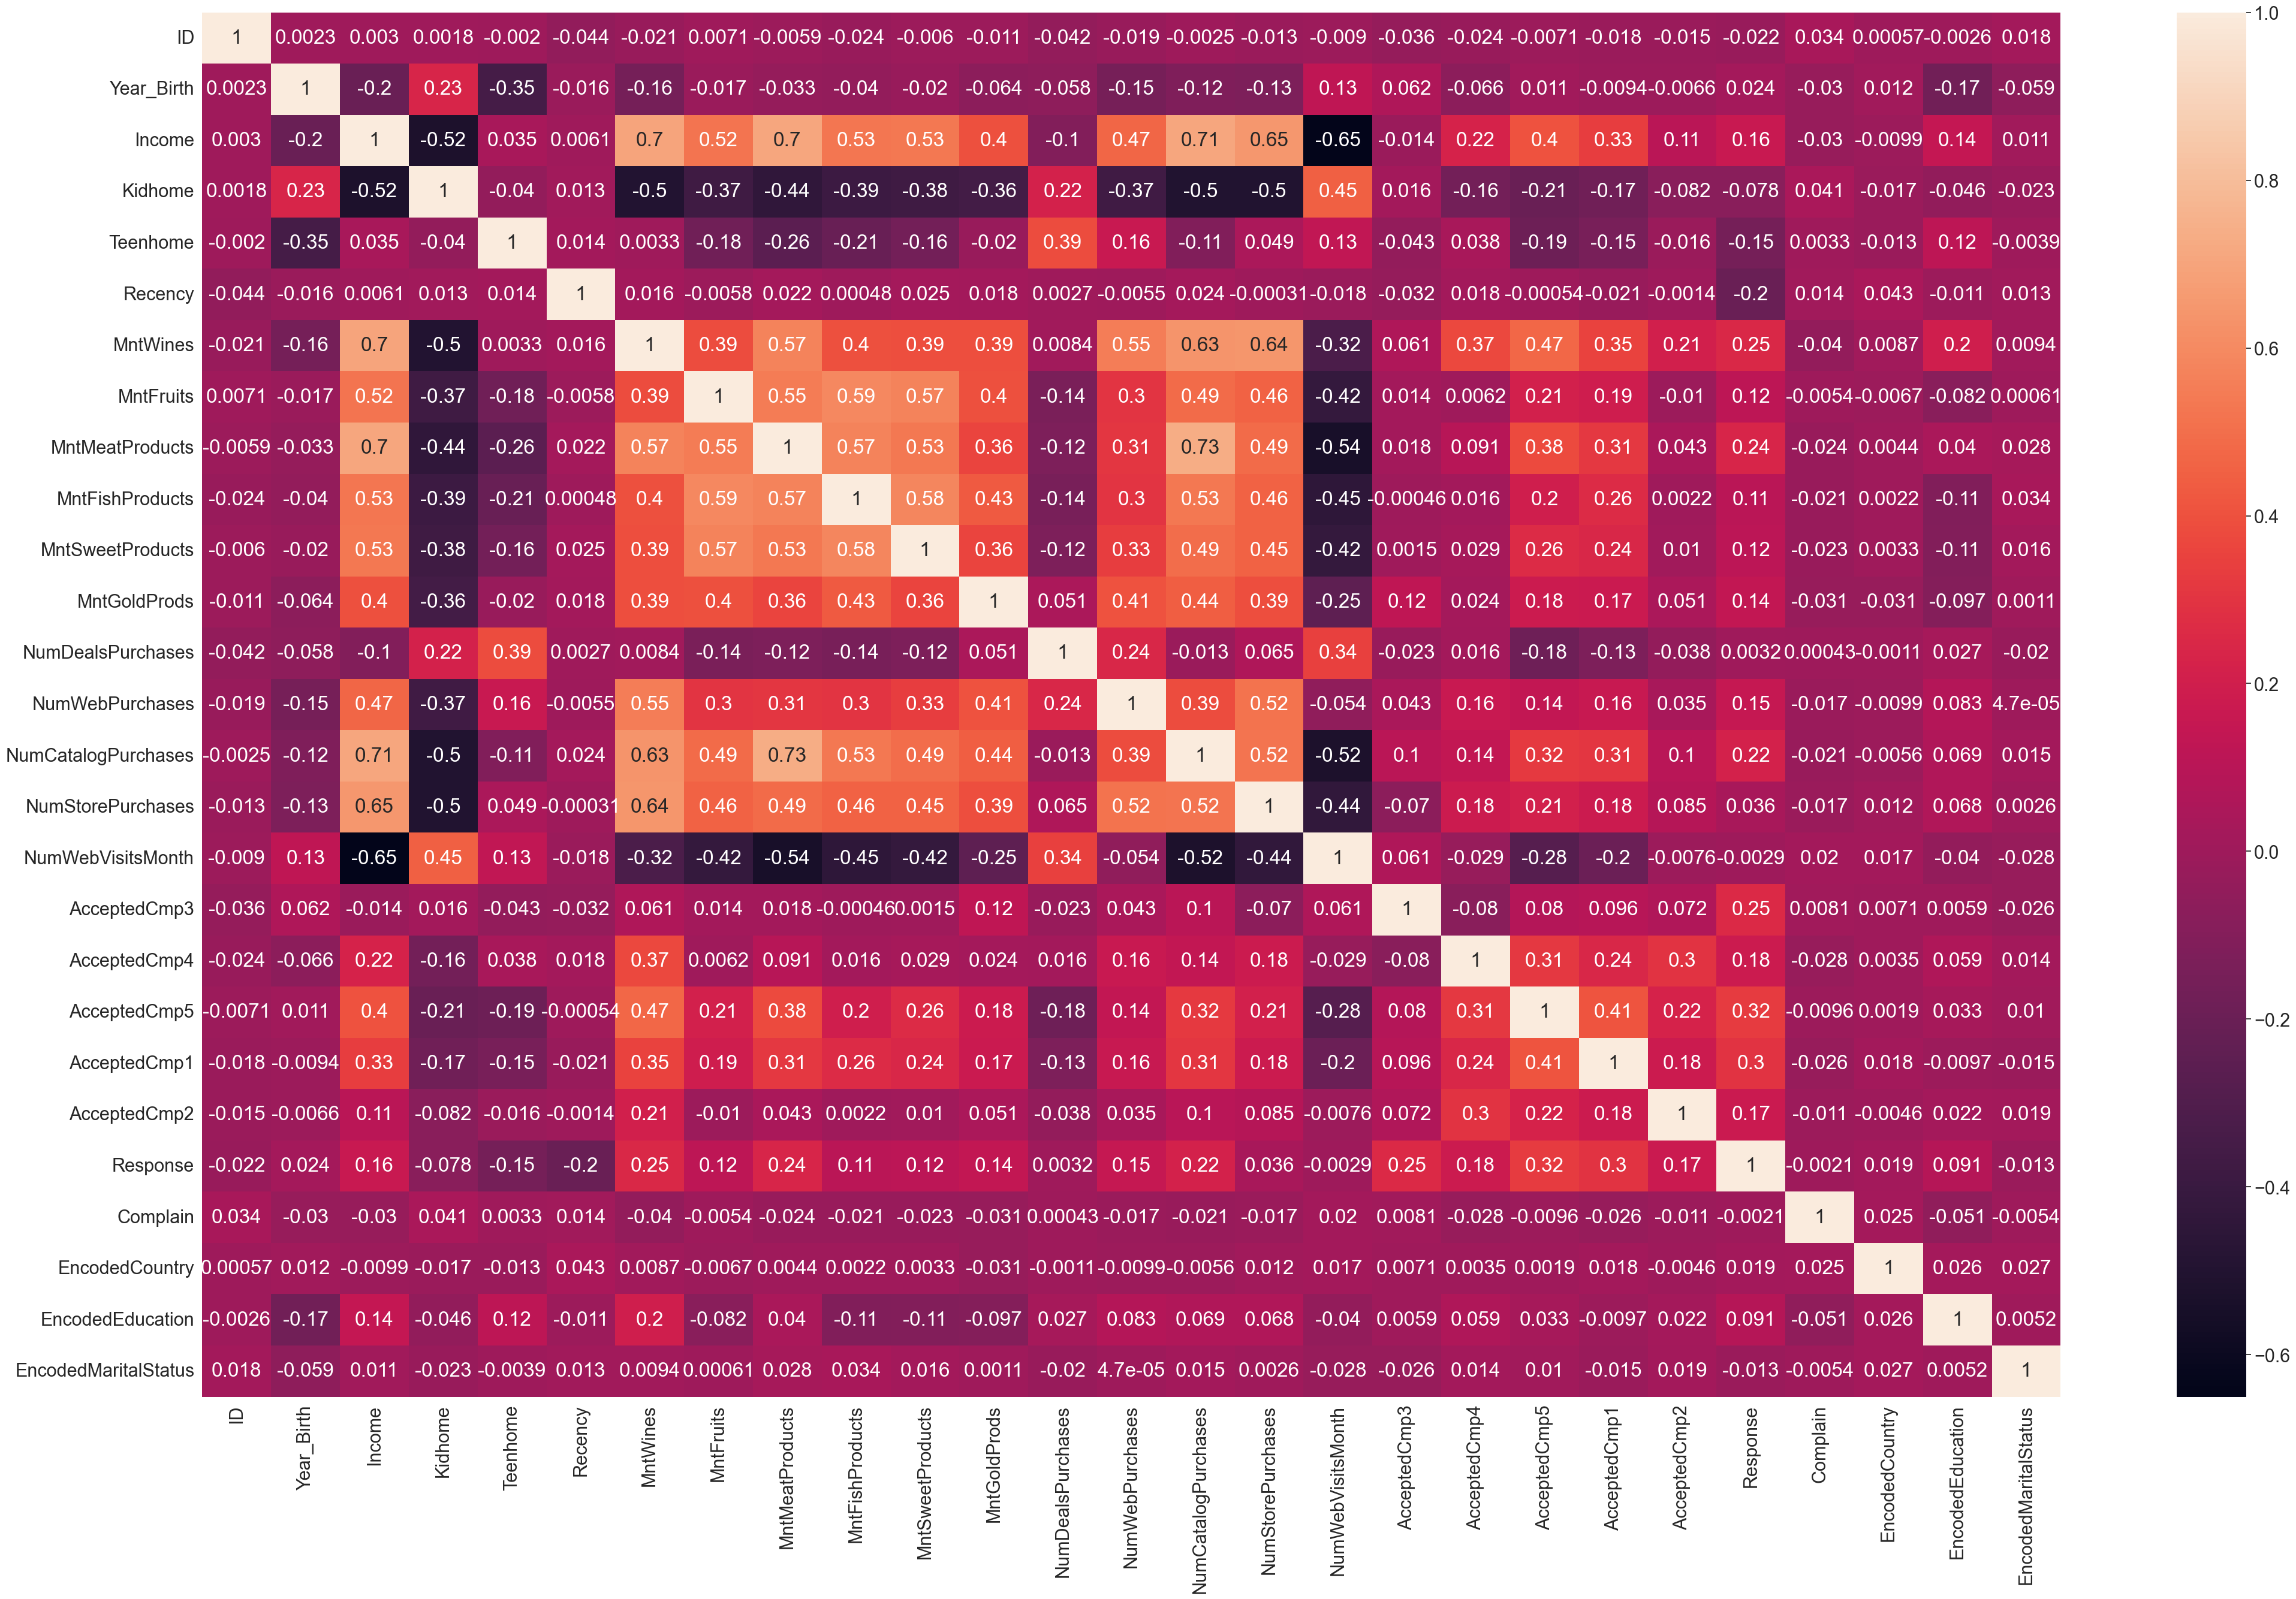

In [21]:
df_New['Income'].astype(float)
plt.figure(figsize = (50,30))
sns.set(font_scale = 2)
sns.heatmap(df_New.corr(),annot = True)

In [22]:
# x = df_New[['Year_Birth','Kidhome', 'Teenhome', 'Recency',
#        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
#        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
#        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
#        'NumWebVisitsMonth','Complain', 'EncodedCountry',
#         'EncodedMaritalStatus']]

## 1st Campaign

In [23]:
x = df_New[['Year_Birth','Kidhome', 'Teenhome', 'Recency','Income',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Complain', 'EncodedCountry',
        'EncodedMaritalStatus']]

y = df_New['AcceptedCmp1']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [24]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [25]:
dtc = DecisionTreeClassifier(random_state = 0)
dtc

DecisionTreeClassifier(random_state=0)

In [26]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.9201807228915663

In [193]:
# Support Vector Machine
svm_class = svm.SVC(kernel = 'linear')

In [194]:
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [195]:
svm_class_prediction = svm_class.predict(x_test)
# svm_class_prediction
accuracy_score(svm_class_prediction,y_test)

0.9428571428571428

In [196]:
gs = GaussianNB()
gs
gs.fit(x_train,y_train)

GaussianNB()

In [197]:
gs_prediction =  gs.predict(x_test)
# gs_prediction

In [198]:
accuracy_score(gs_prediction,y_test)

0.8105263157894737

In [142]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(x_train,y_train)

KMeans()

In [141]:
df_New.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'EncodedCountry', 'EncodedEducation', 'EncodedMaritalStatus'],
      dtype='object')

In [143]:
kmeans_prediction = kmeans.predict(x_test)

In [144]:
accuracy_score(kmeans_prediction,y_test)

0.23458646616541354

## Now For 2nd Campaign

In [31]:
x1 = df_New[['Kidhome', 'Teenhome','Income',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Complain',
        'EncodedMaritalStatus','AcceptedCmp1','EncodedEducation']]

y1 = df_New['AcceptedCmp2']

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.3,random_state = 1)

In [32]:
dtc = DecisionTreeClassifier(random_state=0)

In [33]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.9743975903614458

In [37]:
svm_class = svm.SVC(kernel = 'linear')

In [38]:
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
svm_class_prediction = svm_class.predict(x_test)
# svm_class_prediction
accuracy_score(svm_class_prediction,y_test)

0.9924698795180723

In [35]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [36]:
gs_prediction =  gs.predict(x_test)
# gs_prediction
accuracy_score(gs_prediction,y_test)

0.9262048192771084

## Campaign 3

<Axes: >

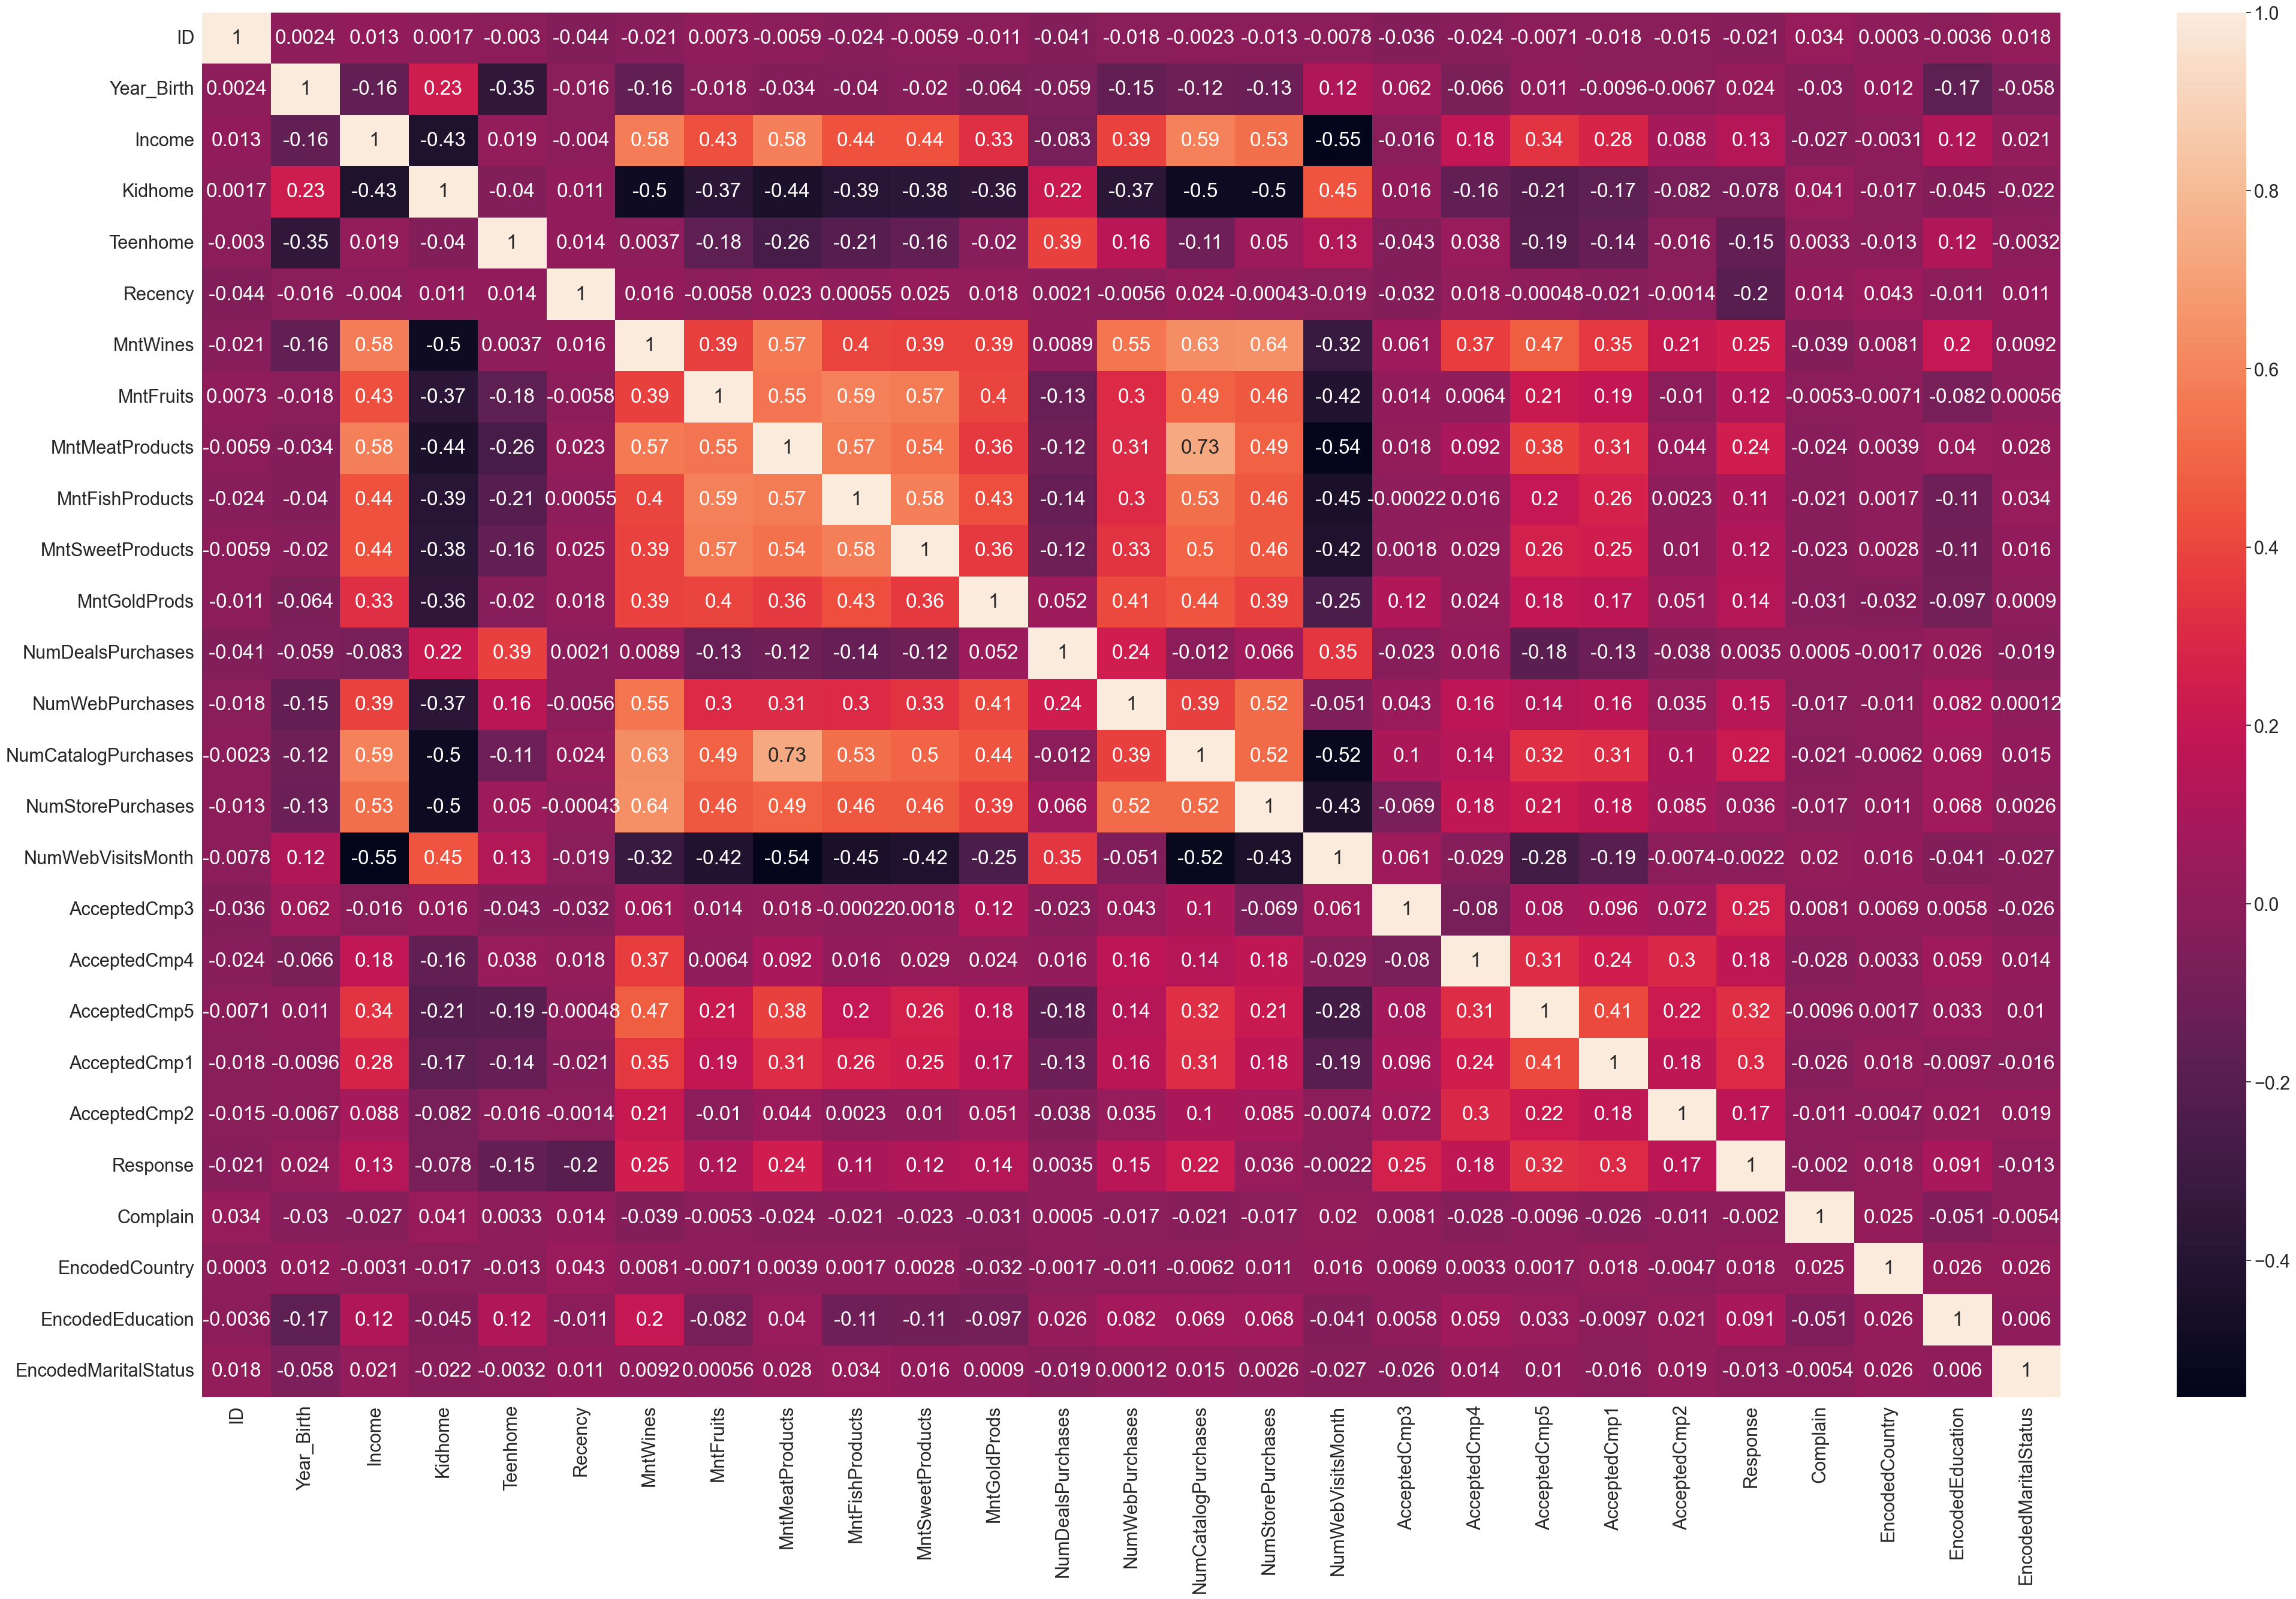

In [154]:
# df_New['Income'].astype(float)
plt.figure(figsize = (50,30))
sns.set(font_scale = 2)
sns.heatmap(df_New.corr(),annot = True)

In [155]:
x2 = df_New[['Year_Birth','Kidhome', 'Teenhome', 'Recency','Income',
       'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Complain', 'EncodedCountry',
        'EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation']]

y2 = df_New['AcceptedCmp3']

x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size = 0.3,random_state = 1)

In [156]:
dtc = DecisionTreeClassifier(random_state=0)

In [157]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [158]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.8902255639097745

In [159]:
svm_class = svm.SVC(kernel = 'linear')

In [160]:
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [161]:
svm_class_prediction = svm_class.predict(x_test)
# svm_class_prediction
accuracy_score(svm_class_prediction,y_test)

0.9157894736842105

In [162]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [163]:
gs_prediction =  gs.predict(x_test)
# gs_prediction
accuracy_score(gs_prediction,y_test)

0.9067669172932331

## campaign 4 

In [164]:
x3 = df_New[['Year_Birth','Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Complain', 'EncodedCountry',
        'EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation','AcceptedCmp3']]

y3 = df_New['AcceptedCmp4']

x_train,x_test,y_train,y_test = train_test_split(x3,y3,test_size = 0.3,random_state = 1)

In [165]:
dtc = DecisionTreeClassifier(random_state=0)

In [166]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [167]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.9233082706766917

In [168]:
svm_class = svm.SVC(kernel = 'linear')
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [169]:
svm_class_prediction = svm_class.predict(x_test)
# svm_class_prediction
accuracy_score(svm_class_prediction,y_test)

0.9323308270676691

In [170]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [171]:
gs_prediction =  gs.predict(x_test)
# gs_prediction
accuracy_score(gs_prediction,y_test)

0.6721804511278195

## 5th Campaign

In [172]:
x4 = df_New[['Year_Birth','Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','EncodedCountry',
        'EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation','AcceptedCmp3','AcceptedCmp4']]

y4 = df_New['AcceptedCmp5']

x_train,x_test,y_train,y_test = train_test_split(x4,y4,test_size = 0.3,random_state = 1)

In [173]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [174]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.9338345864661655

In [175]:
svm_class = svm.SVC(kernel = 'linear')
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [176]:
svm_class_prediction = svm_class.predict(x_test)
# svm_class_prediction
accuracy_score(svm_class_prediction,y_test)

0.9503759398496241

In [177]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [178]:
gs_prediction =  gs.predict(x_test)
# gs_prediction
accuracy_score(gs_prediction,y_test)

0.8827067669172932

## Final Campaign

<Axes: >

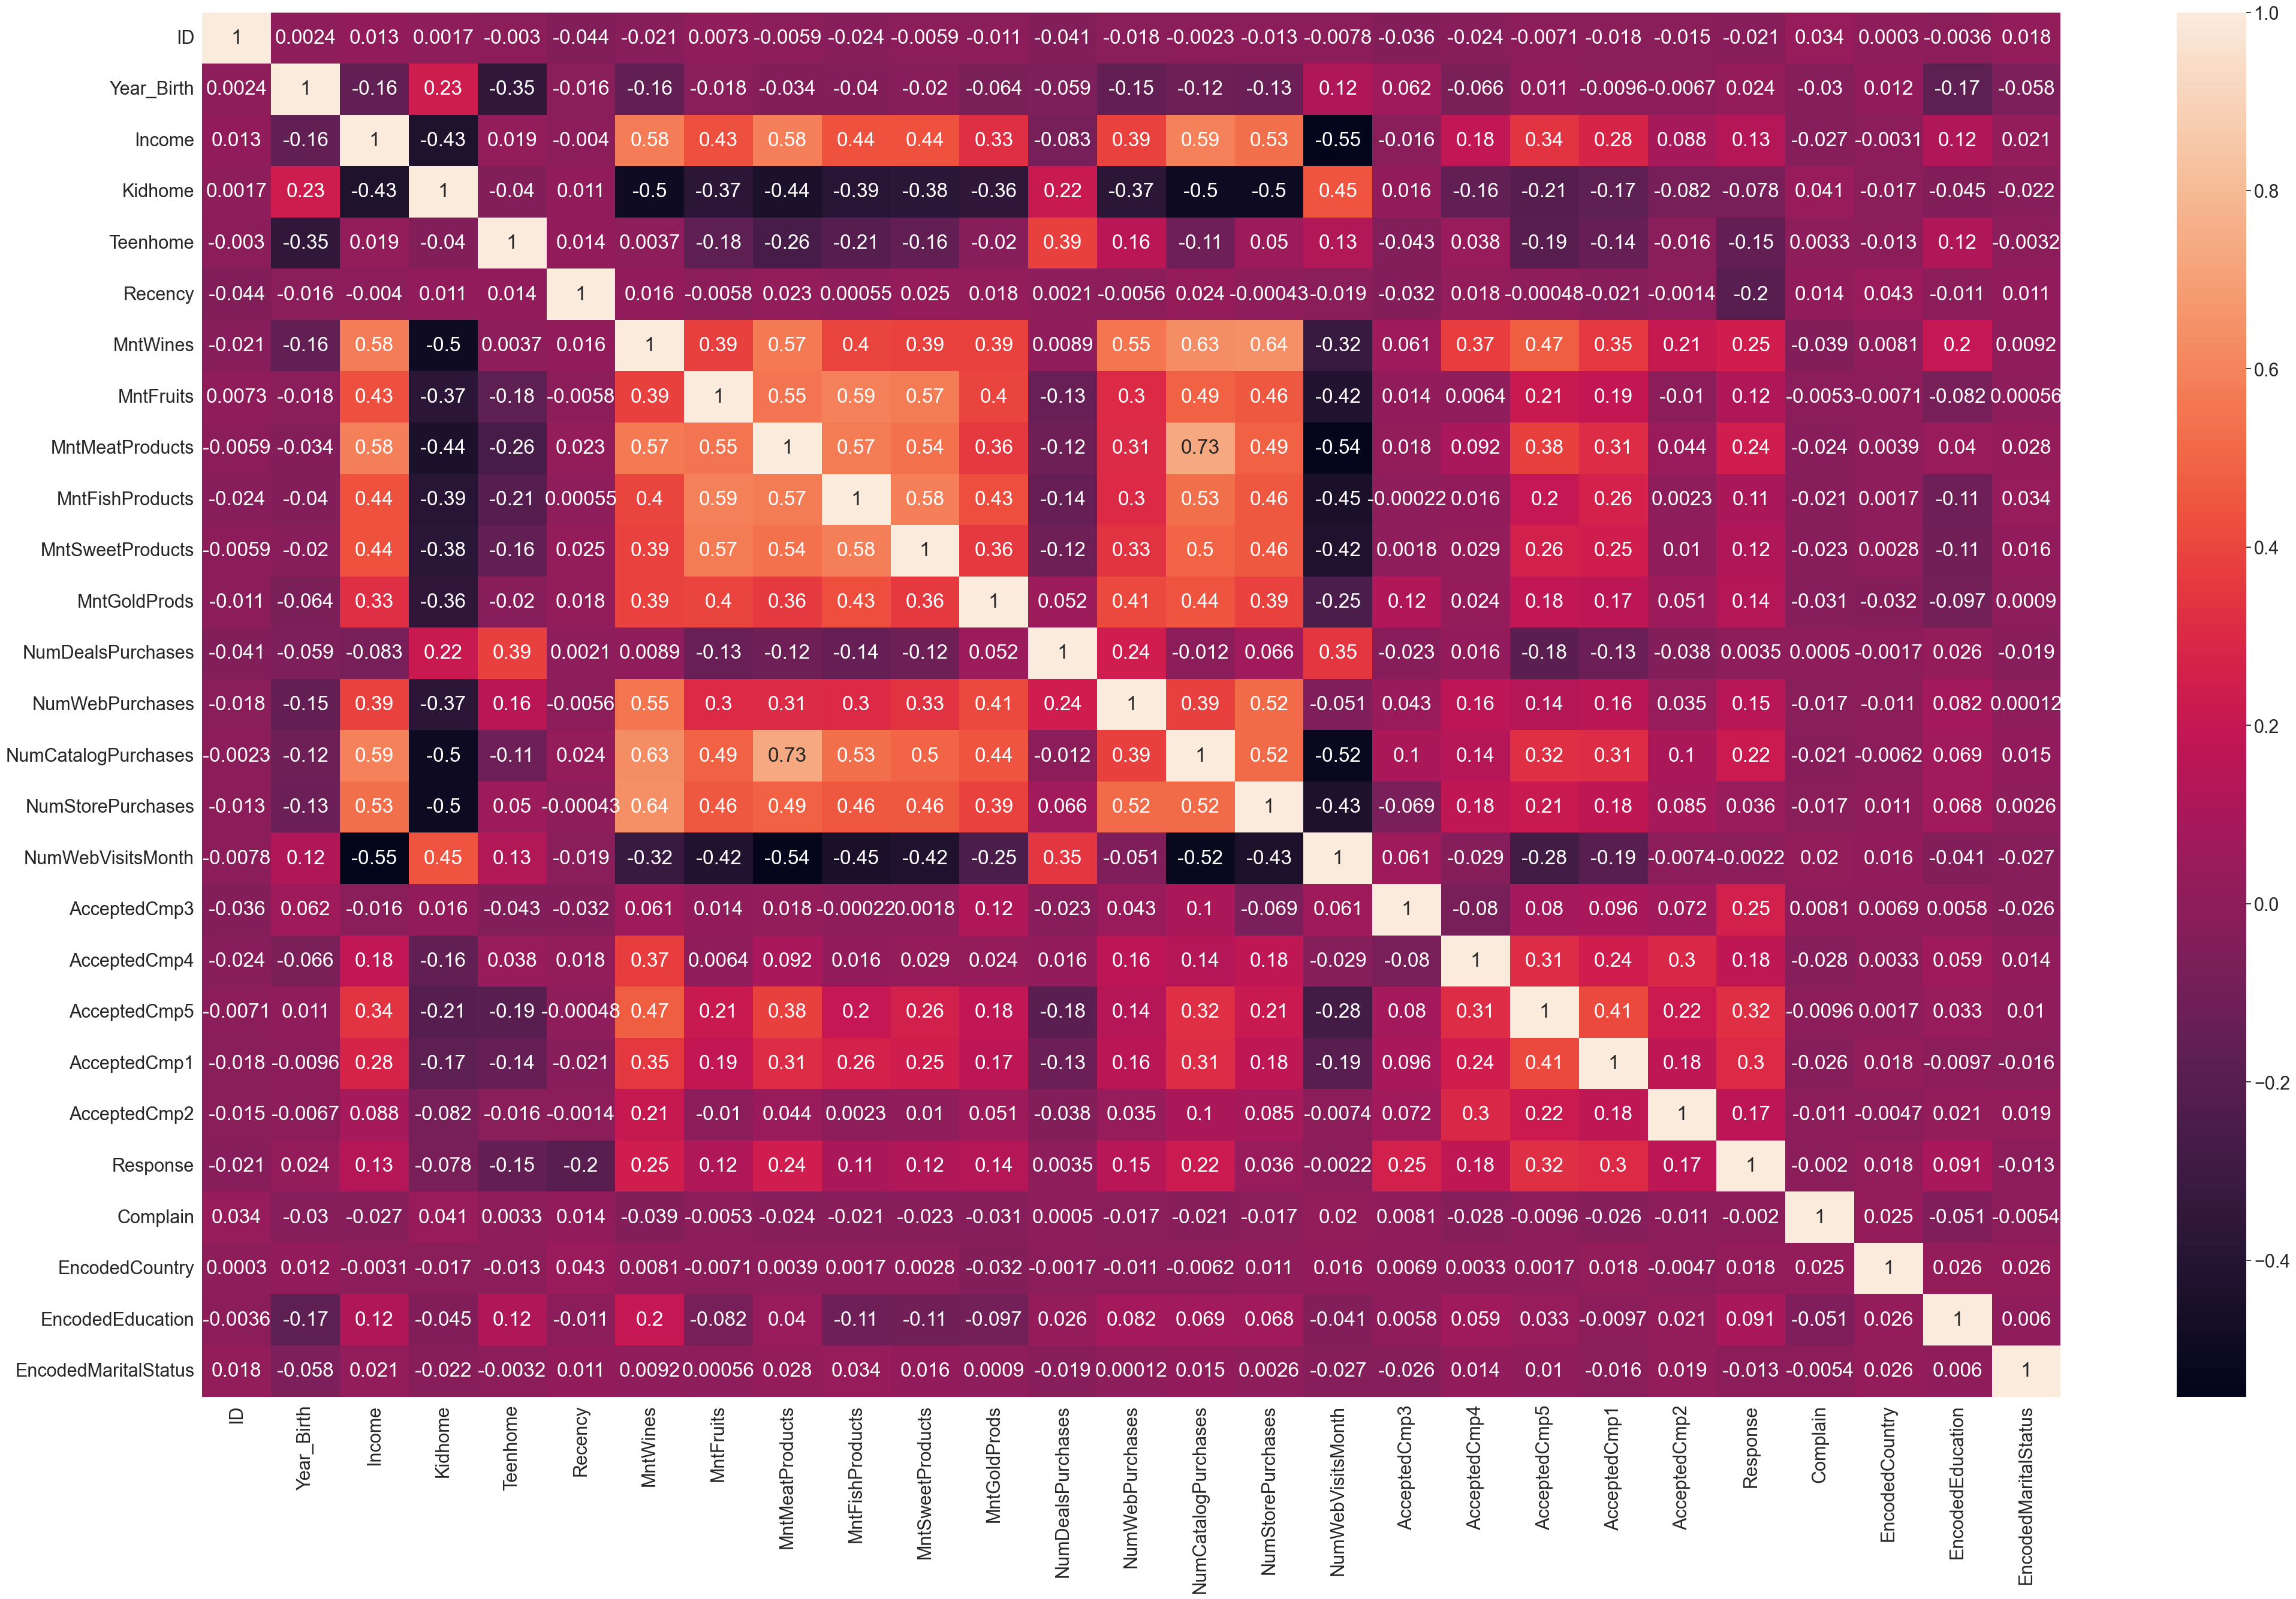

In [179]:
# df_New['Income'].astype(float)
plt.figure(figsize = (50,30))
sns.set(font_scale = 2)
sns.heatmap(df_New.corr(),annot = True)

In [180]:
df_New.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'EncodedCountry', 'EncodedEducation', 'EncodedMaritalStatus'],
      dtype='object')

In [181]:
x5 = df_New[['Year_Birth','Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts','Income','MntSweetProducts', 
             'MntGoldProds', 'NumDealsPurchases','MntFishProducts','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
             'EncodedCountry','EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation','AcceptedCmp3','AcceptedCmp4',
             'AcceptedCmp5']]

y5 = df_New['Response']

x_train,x_test,y_train,y_test = train_test_split(x5,y5,test_size = 0.3,random_state = 1)

In [182]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [183]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.837593984962406

In [184]:
svm_class = svm.SVC(kernel = 'linear')
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [185]:
svm_class_prediction = svm_class.predict(x_test)
# svm_class_prediction
accuracy_score(svm_class_prediction,y_test)

0.843609022556391

In [186]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [187]:
gs_prediction =  gs.predict(x_test)
# gs_prediction
accuracy_score(gs_prediction,y_test)

0.7669172932330827

# *-------------------------**ML Report Of Marketing Dataset**--------------------------*

### Report of Accepted 1st Campaign

Columnns considered for Campaign 1:
- Year_Birth: This column will provide the age data of the customer. Age can provide experience to an customer plus other columns will also be dependent on the age directly or inversely, hence impacting the campaign.

* Income: This column will provide the income data or what is the income of an customer. Income plays a very big roll in 
  the campaign acceptence because if the income is high the chances of acceptence of any campaign will increase.


* Kidhome : Kidhome column is representing number of children in the customers household.

* Teenhome : Teenhome column is representing number of teenager in the customers household. Both the column is affecting the campaign because larger the number of members in a household larger they shop and acceptence is also dependent on this factor.

- Recency : Recency column means Number of days since customer's last purchase. This column will affect different campaign at different point suppose a customer will wait for the better offer to purchase.

- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years

 **(The spending variables (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) can affect marketing campaigns by helping identify target audiences, enabling personalization, revealing cross-selling opportunities, guiding product promotion, influencing campaign messaging, facilitating customer segmentation, and evaluating campaign success. Understanding customers' spending behavior allows marketers to create more relevant and effective campaigns that resonate with their interests and preferences).**
 
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores

**(Understanding the impact of various purchase channels is crucial for a successful marketing campaign. The number of purchases made with discounts reveals customer responsiveness to promotions, guiding targeted promotions. Tracking web, catalog, and in-store purchases helps optimize online and offline strategies. By identifying preferences, resources can be allocated effectively, and customer segmentation can be refined. Analyzing this data empowers marketers to make informed decisions, enhance customer experiences, and drive sales through optimized cross-selling and upselling opportunities. Ultimately, harnessing insights from these columns enables data-driven marketing approaches for greater campaign success.)**

- 'NumWebVisitsMonth': The 'NumWebVisitsMonth' column is crucial for the marketing campaign as it reveals website traffic and engagement levels. Marketers can optimize the website and content, analyze visitor behavior, and improve the conversion funnel. Personalized approaches, retargeting, and understanding customer preferences enhance campaign success and online presence.

- Complain: The "Complain" column impacts marketing significantly. High complaints harm brand reputation, requiring prompt resolution and improved customer support for success.

 - EncodedCountry : The "Country" column helps marketers target and tailor campaigns based on geographic location, improving engagement and conversion rates through localized strategies.
 
 - EncodedMaritalStatus : This column is encoded marital status like (Married,single,divorced, etc).The "Marital Status" column in a marketing campaign's data can significantly impact the effectiveness of targeted marketing efforts. Understanding customers' marital status allows marketers to tailor promotions and messaging to specific demographics. 

-In the first campaign i do not consider some columns or dependent variables because there 
correllation with the **AcceptedCmp1** column is little bit less as compared to other.

-Suppose I consider this columns so I found that my accuracy is down so, I prefer to not include in my **x** valiable.

-I consider **'Year_Birth','Kidhome', 'Teenhome', 'Recency','Income',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Complain', 'EncodedCountry',
        'EncodedMaritalStatus'** these columns at **X** to predict the **AcceptedCmp1** i.e **Target Variable**.

- I Consider three Models to predict the Campaign.
- 1] DecisionTreeClassifier
- 2] Support Vector Machine (SVM)
- 3] GaussianNB

- Accuracy of the models are:-
     - Decision Tree = **0.92**
     - SVM = **0.94**
     - GaussianNB = **0.79**



### Report of Accepted 2nd Campaign

- To find the acceptence of 2nd campaign I drop some columns from the independent variable because I found that the correlation with the AcceptedCmp2 is negligible so I don't consider that columns and I consider **AcceptenceCmp1** Column for better result.

<Axes: >

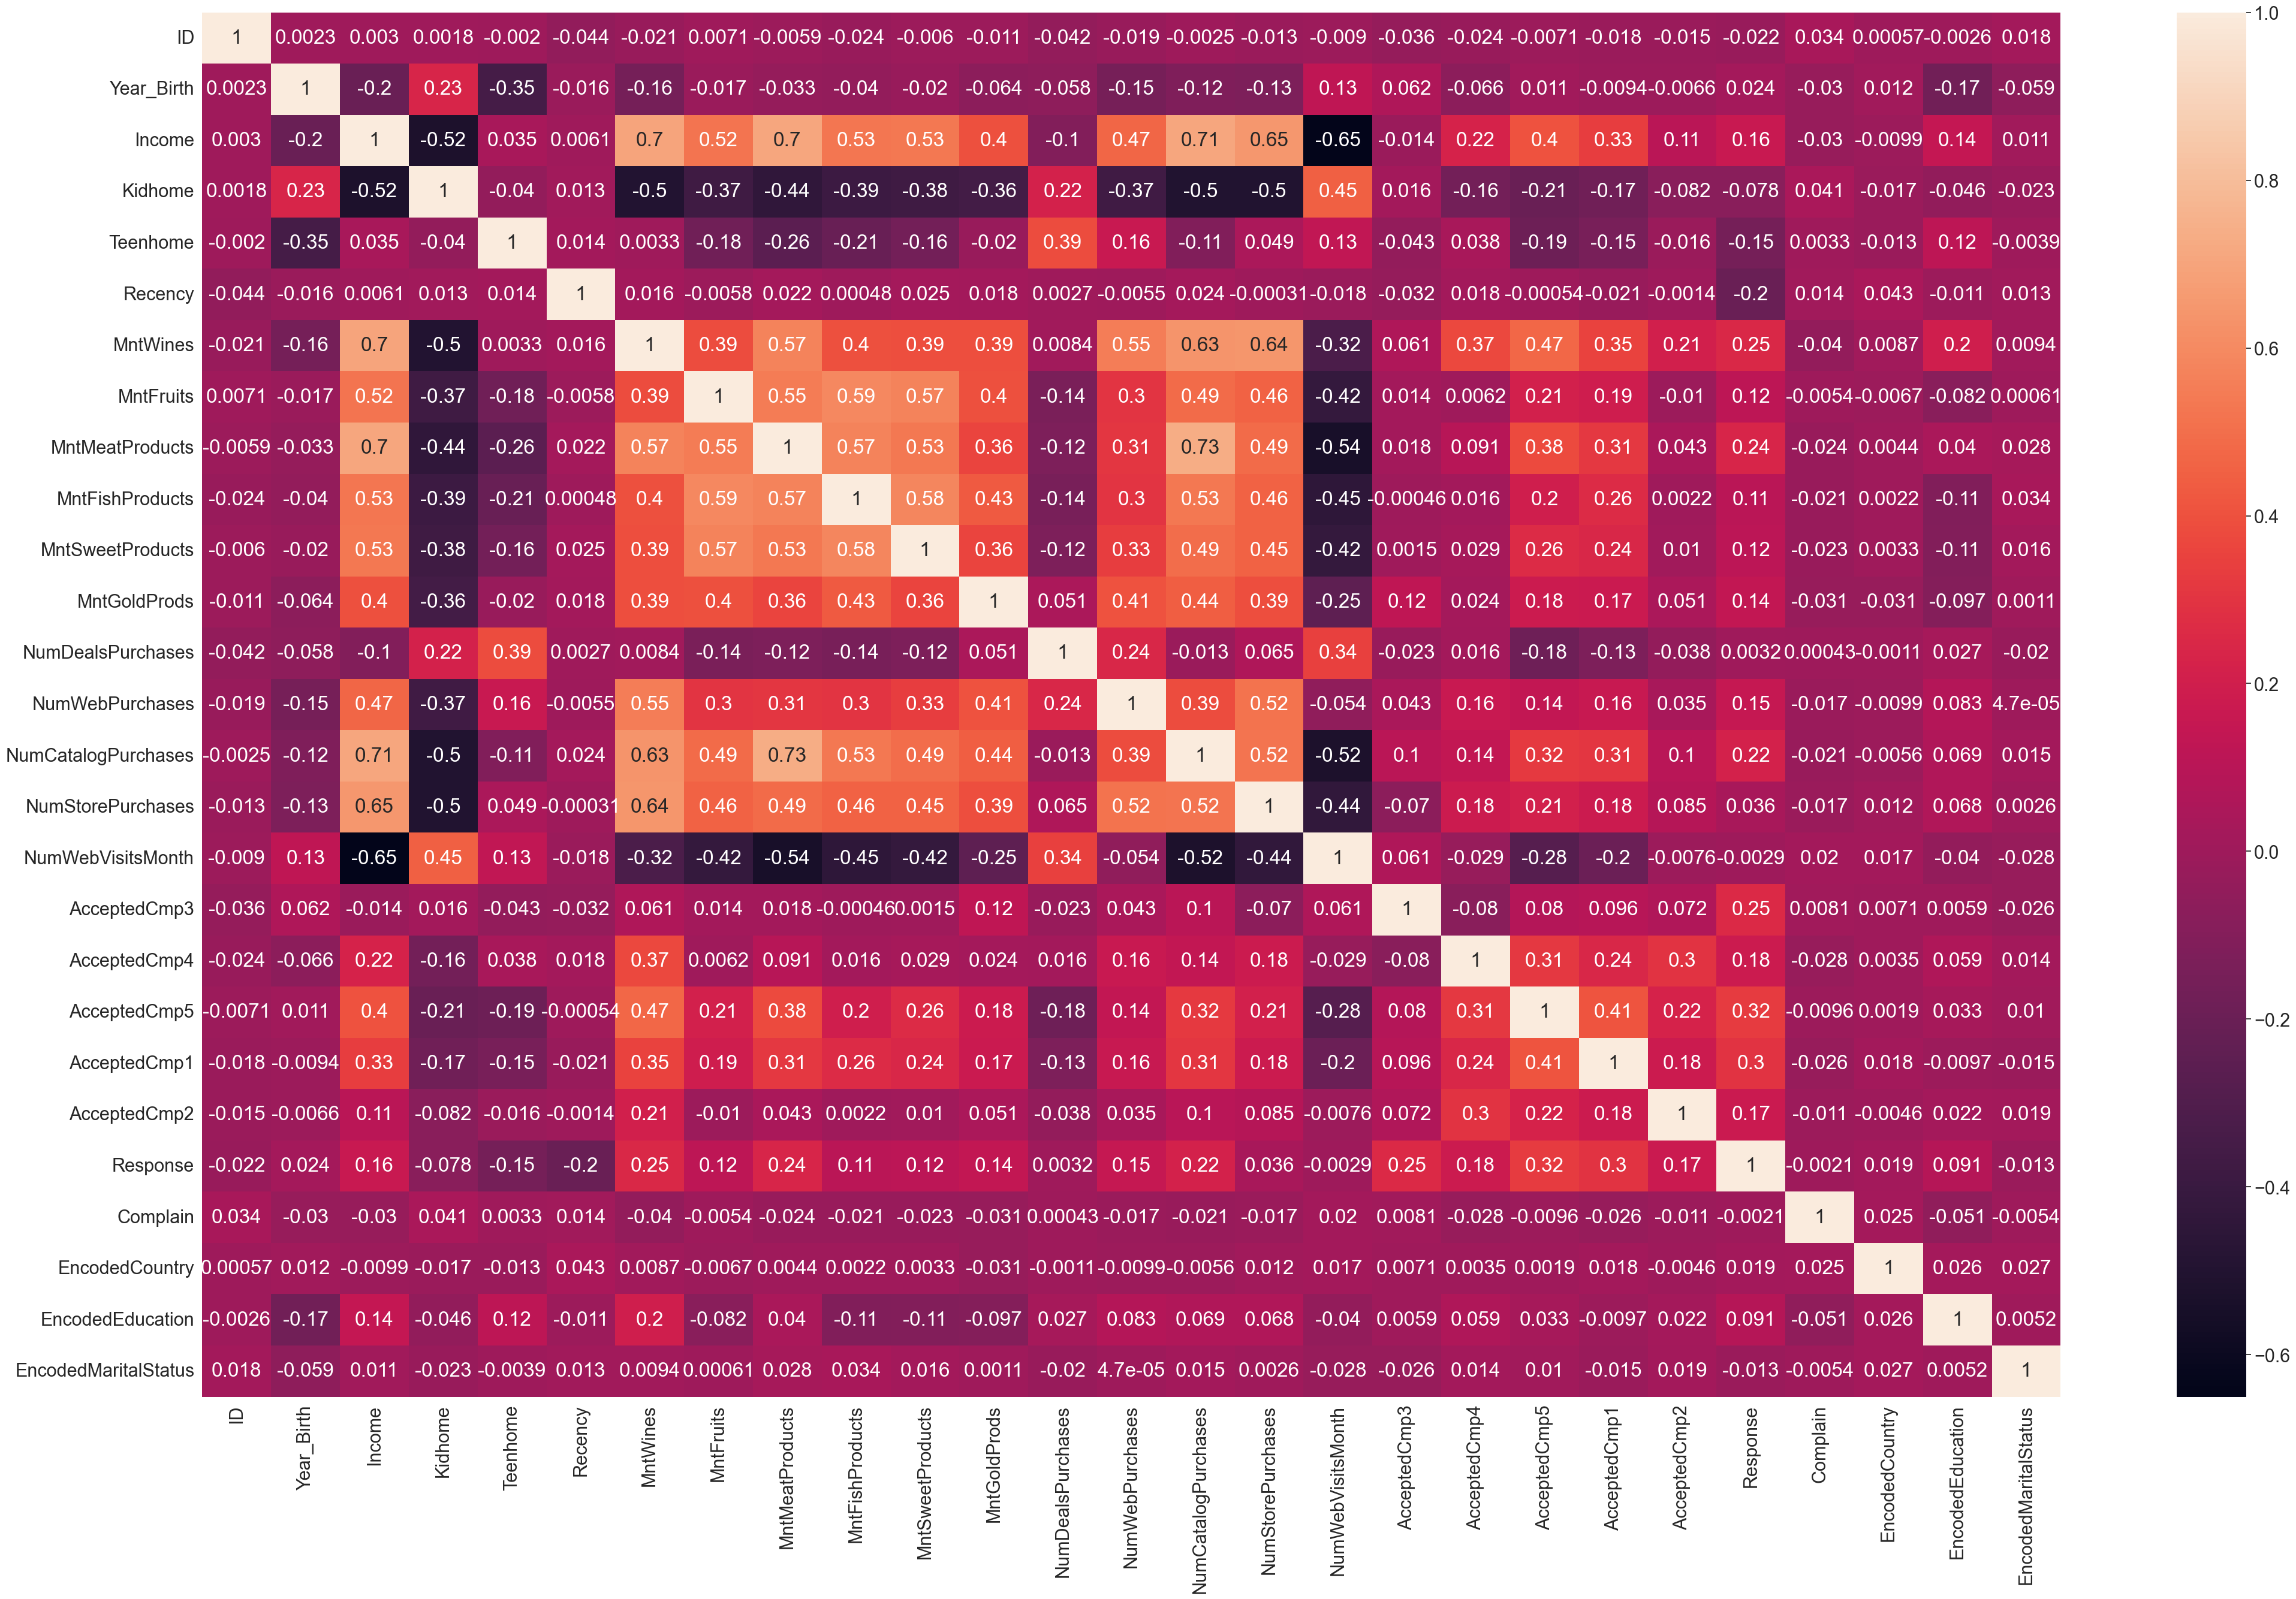

In [42]:
plt.figure(figsize = (50,30))
sns.set(font_scale = 2)
sns.heatmap(df_New.corr(),annot = True)

- I consider **'Kidhome', 'Teenhome','Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 
           'NumStorePurchases','Complain','EncodedMaritalStatus','AcceptedCmp1','EncodedEducation'** 
           these columns to predict the 2nd Campaign Acceptence.

- **Target Variable:** **AcceptedCmp2**

- Accuracy of the models are:-
    - **Decision Tree Accuracy**: **0.97**
    - **SVM Accuracy**          : **0.99**
    - **GaussianNB**            : **0.92**
- I found that the accurracy is increas as compare to **1st Campaign** i.e the model predict more accuratly this time.
- I think becaurse of AcceptedCmp1 column is the factor that increase the accuracy of the model.

**Reason Behind increament in the accuracy.**
- Including "AcceptedCmp1" column improves accuracy as it provides more info on customer behavior and 
responses. Correlation between campaign responses aids predictions, and sequential influence is considered. 
Learning individual preferences helps personalize predictions. Caution against overfitting due to increased complexity. 
Overall, it enhances second campaign acceptance prediction.

### Report of Accepted 3rd Campaign.

- Columns Consider for 3rd campaign **'Year_Birth','Kidhome', 'Teenhome', 'Recency','Income',
       'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Complain', 'EncodedCountry',
        'EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation'**
        
        
        
- **Taget Variable: AcceptedCmp3**
        

- For predicting the 3rd Campaign Acceptence, I consider AcceptedCmp1 and AcceptedCmp2 columns as my independent variable 
to predict the 3rd campaign. And the reason behind droping some columns is again the correllation with the target variable.

- Accuracy of the models are:
    - **Decision Tree Classifier: 0.89**
    - **SVM                     : 0.92**
    - **GaussianNB              : 0.91**

-  **The accuracy of predicting the 3rd campaign can be influenced by the success of the 1st and 2nd campaigns in several ways.
Positive responses to previous campaigns may indicate customer receptiveness, leading to higher accuracy. 
Sequential influence and learning from past campaigns can optimize the 3rd campaign, improving accuracy. 
Customer segmentation and external factors may also play a role in affecting prediction accuracy. 
Leveraging insights from past campaigns refines strategies and boosts accuracy for the 3rd campaign predictions.**

### Report of Accepted 4rd Campaign.

- Columns consider for 4th campaign  **'Year_Birth','Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Complain', 'EncodedCountry',
        'EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation','AcceptedCmp3'**
- **Target Variable: AcceptedCmp4**

- Accuracy of the models are:
    - **Decision Tree Classifier: 0.92**
    - **SVM                     : 0.93**
    - **GaussianNB              : 0.67**
    

- **The increase in accuracy when predicting the 4th campaign compared to the 3rd campaign could be attributed to various factors. The features used as independent variables might exhibit more variability and relevance for the 4th campaign, making it easier for the model to recognize distinct patterns and customer behaviors. Additionally, the 4th campaign might have targeted a more specific customer segment, leading to more accurate predictions. Improved model updates and access to diverse and relevant training data for the 4th campaign may also have contributed to the enhanced accuracy. However, randomness and noise in the data could still play a role, warranting further evaluation and cross-validation to gain a deeper understanding of the underlying reasons for the improvement.**

### Report of Accepted 5th Campaign

- columns consider for 5th campaign **'Year_Birth','Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts','MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','EncodedCountry','EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation','AcceptedCmp3','AcceptedCmp4'**

**Target Variable: AcceptedCmp5**

- Accuracy of the models:
    - **Decision Tree Classifier : 0.93**
    - **SVM: 0.95**
    - **GaussianNB: 0.88**

- **The variations in accuracy between different machine learning models for the 4th and 5th campaigns can be attributed to the inherent characteristics of each model and the unique data distribution in each campaign. Decision trees, with accuracies of 0.92 and 0.93 for the 4th and 5th campaigns respectively, excel at capturing complex relationships. SVM, with accuracies of 0.93 and 0.95, is effective when data has well-defined class boundaries. GaussianNB, with accuracies of 0.67 and 0.88, relies on an independence assumption that might not hold in the 5th campaign data. Choosing the right model based on data characteristics is crucial for achieving better predictive performance.**

### Report of Final Campaign

- Columns consider for final campaign **'Year_Birth','Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts','Income','MntSweetProducts', 
             'MntGoldProds', 'NumDealsPurchases','MntFishProducts','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
             'EncodedCountry','EncodedMaritalStatus','AcceptedCmp1','AcceptedCmp2','EncodedEducation','AcceptedCmp3','AcceptedCmp4',
             'AcceptedCmp5'**
- **Target Variable:Response** 

- Accuracy of the models:
    - **Decision Tree: 0.83**
    - **SVM: 0.84**
    - **GaussianNB: 0.76**

- **The accuracy scores for the last campaign were 0.83 for Decision Tree, 0.84 for SVM, and 0.76 for GaussianNB. Comparing these scores with the accuracies of the 4th and 5th campaigns, we observe that SVM consistently performed well across all campaigns, with accuracies of 0.93 for the 4th and 0.95 for the 5th campaign. On the other hand, the Decision Tree's accuracy dropped from 0.92 in the 4th campaign to 0.83 in the last campaign, suggesting that it might not have adapted well to the changing data patterns. Additionally, GaussianNB struggled in all campaigns, achieving 0.67 in the 4th and 0.88 in the 5th, with further decline to 0.76 in the last campaign due to its assumption of feature independence not being met. The variations in accuracy emphasize the importance of selecting the right model that suits the data characteristics to achieve optimal predictive performance in marketing campaigns.**

## Conclusion